# 数据统计基础

## 常见统计值

### 均值、中位数与众数

In [25]:
def mean(data):
    res = 0.0
    for x in data:
        res += x
    return res / len(data)

mean([10, 9, 8])

9.0

In [26]:
import numpy as np

np.mean([10, 9, 8])

9.0

In [7]:
arr = [9, 8, 7, 6, 1, 2, 3]
arr.sort()

arr[int(len(arr)/2)]

6

In [8]:
import numpy as np
arr = [9, 8, 7, 6, 1, 2, 3]

np.median(arr)

6.0

In [13]:
from collections import Counter

c = Counter([1, 1, 2, 2, 2, 4, 5, 6])
print(c.most_common())
print(c.most_common()[0][0])

[(2, 3), (1, 2), (4, 1), (5, 1), (6, 1)]
2


In [17]:
from scipy import stats
stats.mode([1, 1, 2, 2, 2, 4, 5, 6])

ModeResult(mode=array([2]), count=array([3]))

### 方差

In [19]:
import numpy as np 
arr = [1,2,3,4,5,6]
 
# 方差
arr_var = np.var(arr)
 
# 标准差
arr_std = np.std(arr)

arr_var, arr_std

(2.9166666666666665, 1.707825127659933)

### 最大值、最小值与极差

In [22]:
import numpy as np 
arr = [1,2,3,4,5,6]
 
# 最大值
print(np.max(arr))

# 最小值
print(np.min(arr))

# 极差
print(np.ptp(arr))

6
1
5


### 分位点

In [28]:
import numpy as np 
arr = np.linspace(0, 10, 100)

print(np.quantile(arr, 0.1)) # 10%分位点
print(np.quantile(arr, 0.5)) # 50%分位点

1.0
5.0


### 偏度

Populating the interactive namespace from numpy and matplotlib
-0.017450326467495256


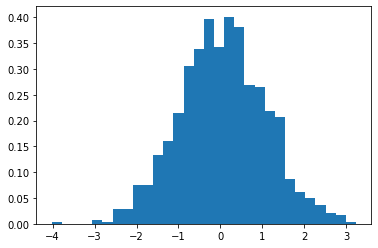

In [54]:
import numpy as np 
from scipy.stats import skew
%pylab inline

arr = np.random.normal(0, 1, 1000)
count, bins, ignored = plt.hist(arr, 30, density=True)

print(skew(arr))

Populating the interactive namespace from numpy and matplotlib
2.083042456457472


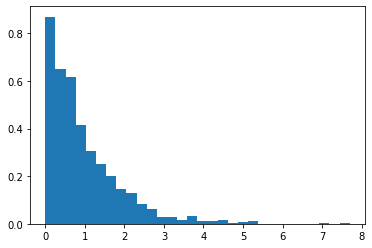

In [60]:
import numpy as np 
from scipy.stats import skew
%pylab inline

arr = np.random.exponential(size=1000)
count, bins, ignored = plt.hist(arr, 30, density=True)

print(skew(arr))

Populating the interactive namespace from numpy and matplotlib
-2.0525730321800184


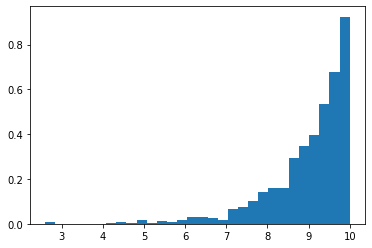

In [61]:
import numpy as np 
from scipy.stats import skew
%pylab inline

arr = 10 - np.random.exponential(size=1000)
count, bins, ignored = plt.hist(arr, 30, density=True)

print(skew(arr))

## 相似度计算

### 皮尔逊相关系数

In [69]:
import numpy as np
arr1 = [0, 0, 1, 1, 1]
arr2 = [0, 1, 0, 1, 1]

np.corrcoef(arr1, arr2)

array([[1.        , 0.16666667],
       [0.16666667, 1.        ]])

In [70]:
from scipy.stats import pearsonr
arr1 = [0, 0, 1, 1, 1]
arr2 = [0, 1, 0, 1, 1]

pearsonr(arr1, arr2)

(0.16666666666666674, 0.7887799817897357)

### 余弦相似度

In [76]:
from sklearn.metrics.pairwise import cosine_similarity

arr1 = [0, 1, 1, 1, 1]
arr2 = [0, 0, 1, 1, 1]
spatial.distance.cosine(arr1, arr2)

0.1339745962155614

### Spearman相关性

In [78]:
from scipy.stats import spearmanr
arr1 = [0, 1, 2, 3, 1]
arr2 = [0, 2, 3, 4, 5]

spearmanr(arr1, arr2)

SpearmanrResult(correlation=0.5642880936468347, pvalue=0.32172333582430024)

### DTW距离

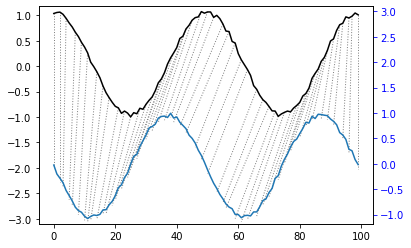

Populating the interactive namespace from numpy and matplotlib


<Figure size 432x288 with 0 Axes>

In [22]:
import numpy as np

## A noisy sine wave as query
idx = np.linspace(0,6.28*2,num=100)
query = np.cos(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
idx = np.linspace(1.57,14.13,num=100)
template = np.cos(idx) - np.random.uniform(size=100)/10.0

## Find the best match with the canonical recursion formula
from dtw import dtw, rabinerJuangStepPattern
alignment = dtw(query, template, keep_internals=True)


## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

%pylab inline
plt.savefig('tmp.png')

# NumPy介绍与使用

## NumPy数组的创建与存储

- 从列表中创建数组

In [79]:
import numpy as np

# 创建1维数组
arr = np.array([1, 2, 3, 4, 5])

# 创建2维数组
arr = np.array([[1, 2, 3], [4, 5, 6]])

- 从内置含函数创建

In [80]:
import numpy as np

# 创建1维数组，从1开始到10的数字（不包括10），数字间距默认为1
arr = np.arange(1, 10)

# 创建1维度等差数组，从1到10
arr = np.linspace(1, 10, 10)

# 随机生成1到10(不包括10)的10个随机整数
arr = np.random.randint(1,10,10)

# 创建维度为5*5的全1矩阵
arr = np.ones((5, 5))

# 创建维度为5*5的全0矩阵
arr = np.zeros((5, 5))

- 存储与加载

In [92]:
import numpy as np

arr = np.ones((5, 5))

# 保存文件
np.save('tmp.npy', arr)
# 读取文件
print(np.load('tmp.npy'))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [100]:
import numpy as np

arr = np.ones((5, 5))

# 保存文件
np.savetxt('tmp.txt', arr)
# 读取文件
print(np.loadtxt('tmp.txt'))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [99]:
x = np.ones((5, 5))
y = np.zeros((5, 5))

# 保存多个文件
np.savez('tmp.npz', x, y)

arr = np.load('tmp.npz')
print(sorted(arr.files))
print(arr['arr_0'])
print(arr['arr_1'])

['arr_0', 'arr_1']
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


- 内存映射

In [101]:
import numpy as np

# 创建3*4大小的磁盘存储
fp = np.memmap('data.dat', dtype='float32', mode='w+', shape=(3,4))

# 按照index进行赋值
fp[0] = 1
fp[1] = 2

# 将改变写入磁盘文件
fp.flush()

# 关闭内存映射
del fp

In [102]:
import numpy as np

# 打开内存映射
rp = np.memmap('data.dat', dtype='float32', mode='r', shape=(3,4))

# 打印第一行
print(rp[0])

# 打印第二行
print(rp[1])

# 打印所有的元素
print(rp[:])

del rp

[1. 1. 1. 1.]
[2. 2. 2. 2.]
[[1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [0. 0. 0. 0.]]


## NumPy中的数据属性

In [110]:
import numpy as np

arr = np.ones((10, 6))
print('ndim', arr.ndim)
print('shape', arr.shape)
print('size', arr.size)
print('dtype', arr.dtype)
print('itemsize', arr.itemsize)
print(arr.flags)

ndim 2
shape (10, 6)
size 60
dtype float64
itemsize 8
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



## NumPy中数据类型

In [128]:
import numpy as np

int8 = np.iinfo(np.int8)
print(f'int8 {int8.min} {int8.max}')

int16 = np.iinfo(np.int16)
print(f'int16 {int16.min} {int16.max}')

int32 = np.iinfo(np.int32)
print(f'int32 {int32.min} {int32.max}')

int64 = np.iinfo(np.int64)
print(f'int64 {int64.min} {int64.max}')

uint8 = np.iinfo(np.uint8)
print(f'uint8 {uint8.min} {uint8.max}')

uint16 = np.iinfo(np.uint16)
print(f'uint16 {uint16.min} {uint16.max}')

uint32 = np.iinfo(np.uint32)
print(f'uint32 {uint32.min} {uint32.max}')

uint64 = np.iinfo(np.uint64)
print(f'uint64 {uint64.min} {uint64.max}')

float16 = np.finfo(np.float16)
print(f'float16 {float16.min} {float16.max}')

float32 = np.finfo(np.float32)
print(f'float32 {float32.min} {float32.max}')

float64 = np.finfo(np.float64)
print(f'float64 {float64.min} {float64.max}')

int8 -128 127
int16 -32768 32767
int32 -2147483648 2147483647
int64 -9223372036854775808 9223372036854775807
uint8 0 255
uint16 0 65535
uint32 0 4294967295
uint64 0 18446744073709551615
float16 -65504.0 65504.0
float32 -3.4028234663852886e+38 3.4028234663852886e+38
float64 -1.7976931348623157e+308 1.7976931348623157e+308


## NumPy中常见运算函数

In [129]:
import numpy as np

A = np.array([[1, 1], [2, 1], [3, -3]])
print(A.transpose())

[[ 1  2  3]
 [ 1  1 -3]]


In [130]:
import numpy as np

M1 = np.array([[3, 6, 9], [5, -10, 15], [-7, 14, 21]])
M2 = np.array([[9, -18, 27], [11, 22, 33], [13, -26, 39]])
M3 = M1 + M2  
print(M3)

[[ 12 -12  36]
 [ 16  12  48]
 [  6 -12  60]]


In [131]:
import numpy as np

M1 = np.array([[3, 6, 9], [5, -10, 15], [-7, 14, 21]])
M2 = np.array([[9, -18, 27], [11, 22, 33], [13, -26, 39]])
M3 = M1 - M2  
print(M3)

[[ -6  24 -18]
 [ -6 -32 -18]
 [-20  40 -18]]


In [132]:
import numpy as np

M1 = np.array([[3, 6], [5, -10]])
M2 = np.array([[9, -18], [11, 22]])
M3 = M1.dot(M2)  
print(M3)

[[  93   78]
 [ -65 -310]]


In [135]:
import numpy as np

M1 = np.array([1,2])
M2 = np.array([3,4])
M3 = np.vdot(M1, M2)  
print(M3)

M4 = M1 * M2
print(M4)

11
[3 8]


In [136]:
import numpy as np

M1 = np.array([[1, 2], [3, 4]])
np.linalg.det(M1)

-2.0000000000000004

In [137]:
import numpy as np

M1 = np.array([ [[1, 2], [3, 4]], [[1, 2], [2, 1]], [[1, 3], [3, 1]] ])
np.linalg.det(M1)

array([-2., -3., -8.])

# Pandas介绍与使用

## Pandas数据读取与存储

Pandas支持非常多的数据格式（如csv、hdf和json等），支持读取与存储。可以通过`read_xx`读取xx格式的文件，并通过`to_xx`写入xx格式的文件，具体支持的文件格式如下所示。

https://pandas.pydata.org/pandas-docs/stable/reference/io.html

> 不同的文件格式所具备的文件格式不同，各具不同的特点，同时读取和写入数据的速度不同。

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://cdn.coggle.club/Pokemon.csv")
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


- 将`DataFrame`写入不同的文件格式

In [8]:
df.to_csv('data.csv', index=None)

df.to_feather('data.feather')

# HDF5支持key to value的存储，在一个文件内可以存储多个DataFrame
df.to_hdf('data.hdf', key='df', index=None)

df.to_parquet('data.parquet', index=None)

df.to_pickle('data.pkl')

- 不同的文件格式读取的速度不同

In [27]:
# 我们创建一个大的DataFrame (100000 * 100的尺寸)，然后测试一下

df = pd.DataFrame(np.random.randint(0, 100, size=(100000, 100)))

df.to_csv('data.csv', index=None)
%time df = pd.read_csv('data.csv')

df.to_feather('data.feather')
%time df = pd.read_feather('data.feather')

df.to_hdf('data.hdf', key='df', index=None)
%time df = pd.read_hdf('data.hdf', 'df')

df.to_parquet('data.parquet', index=None)
%time df = pd.read_parquet('data.parquet')

df.to_pickle('data.pkl')
%time df = pd.read_pickle('data.pkl')

CPU times: user 438 ms, sys: 19.6 ms, total: 458 ms
Wall time: 458 ms
CPU times: user 120 ms, sys: 95.8 ms, total: 216 ms
Wall time: 24.5 ms
CPU times: user 56.2 ms, sys: 25.9 ms, total: 82.2 ms
Wall time: 82.1 ms
CPU times: user 151 ms, sys: 71.5 ms, total: 223 ms
Wall time: 29.8 ms
CPU times: user 5.12 ms, sys: 82.6 ms, total: 87.7 ms
Wall time: 79.9 ms


In [34]:
# 如果在linux系统中，可以执行以下命令得到文件大小
!ls -lh data*

-rw-rw-r-- 1 lyz lyz  28M 1月  30 00:28 data.csv
-rw-rw-r-- 1 lyz lyz  29M 1月  30 00:28 data.feather
-rw-rw-r-- 1 lyz lyz  78M 1月  30 00:28 data.hdf
-rw-rw-r-- 1 lyz lyz 9.1M 1月  30 00:28 data.parquet
-rw-rw-r-- 1 lyz lyz  78M 1月  30 00:28 data.pkl


从上面的对比可知：
 
 - 读取速度（从快至慢）：feather >> parquet >> pikle >> hdf >> csv
 - 文件大小（从小至大）：parquet >> csv >> feather >> pikle >> hdf

## Pandas数据类型

https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html

In [4]:
# 读取原始文件，查看内存使用
import pandas as pd
import numpy as np

df = pd.read_csv("https://cdn.coggle.club/Pokemon.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [11]:
# 读取文件时指定数据类型，查看内存使用
df = pd.read_csv("https://cdn.coggle.club/Pokemon.csv",
                 dtype={'Type 1': 'category', 
                        'Type 2': 'category', 
                        'Legendary': bool,
                        'Speed': np.int16}
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        800 non-null    object  
 1   Type 1      800 non-null    category
 2   Type 2      414 non-null    category
 3   Total       800 non-null    int64   
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    int16   
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(2), int16(1), int64(7), object(1)
memory usage: 55.6+ KB


In [13]:
# 手动进行类型转换
import pandas as pd
df = pd.read_csv("https://cdn.coggle.club/Pokemon.csv")
df['Type 1'] = df['Type 1'].astype('category')
df['Type 2'] = df['Type 2'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        800 non-null    object  
 1   Type 1      800 non-null    category
 2   Type 2      414 non-null    category
 3   Total       800 non-null    int64   
 4   HP          800 non-null    int64   
 5   Attack      800 non-null    int64   
 6   Defense     800 non-null    int64   
 7   Sp. Atk     800 non-null    int64   
 8   Sp. Def     800 non-null    int64   
 9   Speed       800 non-null    int64   
 10  Generation  800 non-null    int64   
 11  Legendary   800 non-null    bool    
dtypes: bool(1), category(2), int64(8), object(1)
memory usage: 60.2+ KB


In [15]:
# 推断类型函数介绍

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

import pandas as pd
df = pd.read_csv("https://cdn.coggle.club/Pokemon.csv")
df = reduce_mem_usage(df)
df.info()

Memory usage of dataframe is 0.07 MB
Memory usage after optimization is: 0.06 MB
Decreased by 7.7%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        800 non-null    category
 1   Type 1      800 non-null    category
 2   Type 2      414 non-null    category
 3   Total       800 non-null    int16   
 4   HP          800 non-null    int16   
 5   Attack      800 non-null    int16   
 6   Defense     800 non-null    int16   
 7   Sp. Atk     800 non-null    int16   
 8   Sp. Def     800 non-null    int16   
 9   Speed       800 non-null    int16   
 10  Generation  800 non-null    int8    
 11  Legendary   800 non-null    float16 
dtypes: category(3), float16(1), int16(7), int8(1)
memory usage: 64.3 KB


## Pandas数据统计
https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html?highlight=describe

In [17]:
import pandas as pd
df = pd.read_csv("https://cdn.coggle.club/Pokemon.csv")

# 统计每列缺失值
df.isnull().sum(axis=0)

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [18]:
# 统计HP列的最大、最小和均值
df["HP"].max(),df["HP"].min(),df["HP"].mean()

(255, 1, 69.25875)

In [24]:
# 统计HP列的极差和方差
df["HP"].var(),df["HP"].std()

(652.0193225907384, 25.53466903233207)

In [22]:
# 统计HP列的元素个数统计
df["HP"].value_counts()

60     67
50     63
70     57
65     46
75     43
       ..
92      1
88      1
81      1
250     1
1       1
Name: HP, Length: 94, dtype: int64

In [23]:
# 独立元素个数
df["HP"].nunique()

94

## Pandas数据索引与筛选

In [27]:
import pandas as pd
df = pd.read_csv("https://cdn.coggle.club/Pokemon.csv")

# 筛选所有行的Name列
df.loc[:, "Name"]

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object

In [28]:
# 设置index列
df.set_index("Name", inplace=True)
df

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [29]:
df.loc["Blastoise"] # 选择Name为Blastoise的行
df.loc["Blastoise", "HP"] # 选择Name为Blastoise的HP值
df.loc[df["Attack"] == 50, "HP"] # 选择Attack等于50记录的HP值

Name
Oddish                    45
Poliwag                   40
Alakazam                  55
AlakazamMega Alakazam     55
Haunter                   45
Electrode                 60
Cubone                    50
Jynx                      65
Noctowl                  100
Natu                      40
Azumarill                100
Magcargo                  50
Swinub                    50
Dustox                    60
Lombre                    60
Pelipper                  60
Plusle                    60
Chimecho                  65
Snorunt                   50
Regice                    80
Drifloon                  90
Skorupi                   40
Togekiss                  85
Rotom                     50
Purrloin                  41
Tympole                   50
Cofagrigus                58
Trubbish                  50
Minccino                  55
Vanillite                 36
Ferroseed                 44
Cryogonal                 70
Fletchling                45
Litleo                    62
Aegislash

In [30]:
df.iloc[5] # 选择第6行

Type 1         Fire
Type 2          NaN
Total           405
HP               58
Attack           64
Defense          58
Sp. Atk          80
Sp. Def          65
Speed            80
Generation        1
Legendary     False
Name: Charmeleon, dtype: object

In [31]:
df.iloc[:10, :5] # 选择前10行，前5列

,Type 1,Type 2,Total,HP,Attack
Name,,,,,
Bulbasaur,Grass,Poison,318,45,49
Ivysaur,Grass,Poison,405,60,62
Venusaur,Grass,Poison,525,80,82
VenusaurMega Venusaur,Grass,Poison,625,80,100
Charmander,Fire,NaN,309,39,52
Charmeleon,Fire,NaN,405,58,64
Charizard,Fire,Flying,534,78,84
CharizardMega Charizard X,Fire,Dragon,634,78,130
CharizardMega Charizard Y,Fire,Flying,634,78,104


In [32]:
df["HP"] # 选择HP列

Name
Bulbasaur                45
Ivysaur                  60
Venusaur                 80
VenusaurMega Venusaur    80
Charmander               39
                         ..
Diancie                  50
DiancieMega Diancie      50
HoopaHoopa Confined      80
HoopaHoopa Unbound       80
Volcanion                80
Name: HP, Length: 800, dtype: int64

In [33]:
df[["HP", "Attack"]] # 选择HP和Attack列

,HP,Attack
Name,,
Bulbasaur,45,49
Ivysaur,60,62
Venusaur,80,82
VenusaurMega Venusaur,80,100
Charmander,39,52
...,...,...
Diancie,50,100
DiancieMega Diancie,50,160
HoopaHoopa Confined,80,110


## Pandas数据分组和聚合

### groupby

In [34]:
import pandas as pd
df = pd.read_csv("https://cdn.coggle.club/Pokemon.csv")
df.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [37]:
# 迭代打印所有的分组数据
for tmp_df in df.groupby('Type 1'):
    print(tmp_df[0], tmp_df[1].shape)

Bug (69, 12)
Dark (31, 12)
Dragon (32, 12)
Electric (44, 12)
Fairy (17, 12)
Fighting (27, 12)
Fire (52, 12)
Flying (4, 12)
Ghost (32, 12)
Grass (70, 12)
Ground (32, 12)
Ice (24, 12)
Normal (98, 12)
Poison (28, 12)
Psychic (57, 12)
Rock (44, 12)
Steel (27, 12)
Water (112, 12)


In [39]:
# 根据Type 1分组统计HP的最大值
df.groupby("Type 1")["HP"].max()

Type 1
Bug          86
Dark        126
Dragon      125
Electric     90
Fairy       126
Fighting    144
Fire        115
Flying       85
Ghost       150
Grass       123
Ground      115
Ice         110
Normal      255
Poison      105
Psychic     190
Rock        123
Steel       100
Water       170
Name: HP, dtype: int64

In [40]:
# 根据Type 1分组统计Legendary的取值个数
df.groupby("Type 1")["Legendary"].value_counts()

Type 1    Legendary
Bug       False         69
Dark      False         29
          True           2
Dragon    False         20
          True          12
Electric  False         40
          True           4
Fairy     False         16
          True           1
Fighting  False         27
Fire      False         47
          True           5
Flying    False          2
          True           2
Ghost     False         30
          True           2
Grass     False         67
          True           3
Ground    False         28
          True           4
Ice       False         22
          True           2
Normal    False         96
          True           2
Poison    False         28
Psychic   False         43
          True          14
Rock      False         40
          True           4
Steel     False         23
          True           4
Water     False        108
          True           4
Name: Legendary, dtype: int64

### apply

In [41]:
# 根据Type 1分组统计HP的最大值
df.groupby("Type 1")["HP"].apply(np.max)

Type 1
Bug          86
Dark        126
Dragon      125
Electric     90
Fairy       126
Fighting    144
Fire        115
Flying       85
Ghost       150
Grass       123
Ground      115
Ice         110
Normal      255
Poison      105
Psychic     190
Rock        123
Steel       100
Water       170
Name: HP, dtype: int64

In [42]:
# 根据Type 1分组统计HP的最大值
df.groupby("Type 1")["HP"].apply(lambda x: np.max(x))

Type 1
Bug          86
Dark        126
Dragon      125
Electric     90
Fairy       126
Fighting    144
Fire        115
Flying       85
Ghost       150
Grass       123
Ground      115
Ice         110
Normal      255
Poison      105
Psychic     190
Rock        123
Steel       100
Water       170
Name: HP, dtype: int64

In [43]:
# 根据Type 1分组统计HP的中位数
df.groupby("Type 1")["HP"].apply(lambda x: np.percentile(x, 0.5))

Type 1
Bug          7.460
Dark        35.750
Dragon      41.620
Electric    21.075
Fairy       35.720
Fighting    30.650
Fire        38.255
Flying      40.585
Ghost       21.550
Grass       31.725
Ground      13.875
Ice         37.035
Normal      32.425
Poison      35.675
Psychic     21.400
Rock        30.000
Steel       40.000
Water       20.000
Name: HP, dtype: float64

### agg

In [44]:
df.groupby("Type 1")["HP"].agg(['mean', 'min', 'max']) 

,mean,min,max
Type 1,,,
Bug,56.884058,1,86
Dark,66.806452,35,126
Dragon,83.312500,41,125
Electric,59.795455,20,90
Fairy,74.117647,35,126
Fighting,69.851852,30,144
Fire,69.903846,38,115
Flying,70.750000,40,85
Ghost,64.437500,20,150


In [45]:
df.groupby("Type 1").agg({
    'HP': ['mean', 'max', 'min'],
    'Attack': ['mean', 'max', 'min'],
})

HP               Attack         
               mean  max min        mean  max min
Type 1                                           
Bug       56.884058   86   1   70.971014  185  10
Dark      66.806452  126  35   88.387097  150  50
Dragon    83.312500  125  41  112.125000  180  50
Electric  59.795455   90  20   69.090909  123  30
Fairy     74.117647  126  35   61.529412  131  20
Fighting  69.851852  144  30   96.777778  145  35
Fire      69.903846  115  38   84.769231  160  30
Flying    70.750000   85  40   78.750000  115  30
Ghost     64.437500  150  20   73.781250  165  30
Grass     67.271429  123  30   73.214286  132  27
Ground    73.781250  115  10   95.750000  180  40
Ice       72.000000  110  36   72.750000  130  30
Normal    77.275510  255  30   73.469388  160   5
Poison    67.250000  105  35   74.678571  106  43
Psychic   70.631579  190  20   71.456140  190  20
Rock      65.363636  123  30   92.863636  165  40
Steel     65.222222  100  40   92.703704  150  24
Water     72.062500  170  20   74.151786  155  10

### transform

In [47]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [50]:
df["Type 1"].map(df.groupby("Type 1")["HP"].max())

0      123
1      123
2      123
3      123
4      115
      ... 
795    123
796    123
797    190
798    190
799    115
Name: Type 1, Length: 800, dtype: int64

In [46]:
df.groupby("Type 1")["HP"].transform('max')

0      123
1      123
2      123
3      123
4      115
      ... 
795    123
796    123
797    190
798    190
799    115
Name: HP, Length: 800, dtype: int64

## Pandas透视表和交叉表

### 透视表（pivot table）

In [51]:
import pandas as pd
df = pd.read_csv("https://cdn.coggle.club/Pokemon.csv")
# 根据Type 1和Type 2分组统计其他列的平均值

# 方法1
df.groupby(['Type 1', 'Type 2']).mean()

Total         HP  ...  Generation  Legendary
Type 1 Type 2                           ...                       
Bug    Electric  395.500000  60.000000  ...    5.000000        0.0
       Fighting  550.000000  80.000000  ...    2.000000        0.0
       Fire      455.000000  70.000000  ...    5.000000        0.0
       Flying    419.500000  63.000000  ...    2.857143        0.0
       Ghost     236.000000   1.000000  ...    3.000000        0.0
...                     ...        ...  ...         ...        ...
Water  Ice       511.666667  90.000000  ...    1.000000        0.0
       Poison    426.666667  61.666667  ...    1.333333        0.0
       Psychic   481.000000  87.000000  ...    1.200000        0.0
       Rock      428.750000  70.750000  ...    3.750000        0.0
       Steel     530.000000  84.000000  ...    4.000000        0.0

[136 rows x 9 columns]

In [52]:
# 方法2
df.pivot_table(index=['Type 1', 'Type 2'])

Attack     Defense  ...      Speed       Total
Type 1 Type 2                            ...                       
Bug    Electric   62.000000   55.000000  ...  86.500000  395.500000
       Fighting  155.000000   95.000000  ...  80.000000  550.000000
       Fire       72.500000   60.000000  ...  80.000000  455.000000
       Flying     70.142857   61.571429  ...  82.857143  419.500000
       Ghost      90.000000   45.000000  ...  40.000000  236.000000
...                     ...         ...  ...        ...         ...
Water  Ice        83.333333  113.333333  ...  66.666667  511.666667
       Poison     68.333333   58.333333  ...  85.000000  426.666667
       Psychic    73.000000  104.000000  ...  44.000000  481.000000
       Rock       82.750000  112.750000  ...  36.000000  428.750000
       Steel      86.000000   88.000000  ...  60.000000  530.000000

[136 rows x 9 columns]

In [59]:
# 方法2
df.pivot_table(index=['Type 1', 'Type 2'], aggfunc=np.min)

Attack  Defense  Generation  ...  Sp. Def  Speed Total
Type 1 Type 2                                 ...                      
Bug    Electric      47       50           5  ...       50     65   319
       Fighting     125       75           2  ...       95     75   500
       Fire          60       55           5  ...       55     60   360
       Flying        20       30           1  ...       42     40   244
       Ghost         90       45           3  ...       30     40   236
...                 ...      ...         ...  ...      ...    ...   ...
Water  Ice           70       80           1  ...       45     60   475
       Poison        40       35           1  ...       55     70   335
       Psychic       65       65           1  ...       40     15   315
       Rock          55       85           2  ...       45     22   355
       Steel         86       88           4  ...      101     60   530

[136 rows x 10 columns]

### 交叉表（crosstab）

In [63]:
import pandas as pd
df = pd.read_csv("https://cdn.coggle.club/Pokemon.csv")
# 根据Type 1和Type 2分组统计样本频率

# 方法1
df.pivot_table(index=['Type 1'],columns='Type 2', aggfunc=len, margins=True).fillna(0)

Attack                              ...   Total                       
Type 2      Bug  Dark Dragon Electric Fairy  ... Psychic  Rock Steel Water  All
Type 1                                       ...                               
Bug         0.0   0.0    0.0      2.0   0.0  ...     0.0   3.0   7.0   1.0   52
Dark        0.0   0.0    3.0      0.0   0.0  ...     2.0   0.0   2.0   0.0   21
Dragon      0.0   0.0    0.0      1.0   1.0  ...     4.0   0.0   0.0   0.0   21
Electric    0.0   0.0    1.0      0.0   1.0  ...     0.0   0.0   3.0   1.0   17
Fairy       0.0   0.0    0.0      0.0   0.0  ...     0.0   0.0   0.0   0.0    2
Fighting    0.0   1.0    0.0      0.0   0.0  ...     3.0   0.0   2.0   0.0    7
Fire        0.0   0.0    1.0      0.0   0.0  ...     2.0   1.0   1.0   1.0   24
Flying      0.0   0.0    2.0      0.0   0.0  ...     0.0   0.0   0.0   0.0    2
Ghost       0.0   1.0    2.0      0.0   0.0  ...     0.0   0.0   0.0   0.0   22
Grass       0.0   3.0    1.0      0.0   2.0  ...     2.0   0.0   2.0   0.0   37
Ground      0.0   3.0    2.0      1.0   0.0  ...     2.0   3.0   1.0   0.0   19
Ice         0.0   0.0    0.0      0.0   0.0  ...     2.0   0.0   0.0   3.0   11
Normal      0.0   0.0    0.0      0.0   5.0  ...     2.0   0.0   0.0   1.0   37
Poison      1.0   3.0    1.0      0.0   0.0  ...     0.0   0.0   0.0   1.0   13
Psychic     0.0   1.0    0.0      0.0   6.0  ...     0.0   0.0   0.0   0.0   19
Rock        2.0   2.0    2.0      0.0   3.0  ...     2.0   0.0   3.0   6.0   35
Steel       0.0   0.0    1.0      0.0   3.0  ...     7.0   3.0   0.0   0.0   22
Water       0.0   6.0    2.0      2.0   2.0  ...     5.0   4.0   1.0   0.0   53
All         3.0  20.0   18.0      6.0  23.0  ...    33.0  14.0  22.0  14.0  414

[19 rows x 190 columns]

In [61]:
# 方法2
pd.crosstab(df['Type 1'], df['Type 2'])

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,0,12,0,3,7,1
Dark,0,0,3,0,0,2,3,5,2,0,0,2,0,0,2,0,2,0
Dragon,0,0,0,1,1,0,1,6,0,0,5,3,0,0,4,0,0,0
Electric,0,0,1,0,1,0,1,5,1,1,0,1,2,0,0,0,3,1
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3,0,2,0
Fire,0,0,1,0,0,7,0,6,0,0,3,0,2,0,2,1,1,1
Flying,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ghost,0,1,2,0,0,0,3,2,0,10,0,0,0,4,0,0,0,0


# Pandas性能加速

## 遍历数据

速度从快至慢：numpy >> itertuples >> iterrows >> iloc

In [65]:
import pandas as pd
df = pd.DataFrame(np.random.randint(0, 100, size=(100000, 100)))

In [70]:
def iloc_loop():
    c = 0
    for idx in range(df.shape[0]):
        c += df.iloc[idx][0]
    print(c)
    
%time iloc_loop()

4954422
CPU times: user 5.89 s, sys: 0 ns, total: 5.89 s
Wall time: 5.89 s


In [72]:
def numpy_loop():
    df_numpy = df.to_numpy()
    c = 0
    for idx in range(df.shape[0]):
        c += df_numpy[idx][0]
    print(c)
    
%time numpy_loop()

4954422
CPU times: user 35.7 ms, sys: 0 ns, total: 35.7 ms
Wall time: 34.9 ms


In [82]:
def iterrows_loop():
    c = 0
    for x in df.iterrows():
        c += x[1][0]
    print(c)
    
%time iterrows_loop()

4954422
CPU times: user 4.51 s, sys: 0 ns, total: 4.51 s
Wall time: 4.51 s


In [87]:
def itertuples_loop():
    c = 0
    for x in df.itertuples():
        c += x._1
    print(c)
    
%time itertuples_loop()

4954422
CPU times: user 545 ms, sys: 0 ns, total: 545 ms
Wall time: 543 ms


## Numba

https://numba.readthedocs.io/en/stable/index.html

In [145]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(1, 100, size=(10000, 100)))
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,11,45,63,68,69,57,12,32,3,71,34,65,54,31,27,37,58,19,31,63,35,62,9,14,93,89,75,27,52,16,70,55,13,96,32,91,49,50,91,67,...,5,71,44,70,97,8,35,75,70,2,99,69,82,91,47,34,75,10,80,87,5,75,90,4,74,40,32,49,27,46,12,58,60,27,45,33,89,81,22,44
1,82,9,55,85,42,20,16,61,38,81,46,77,12,8,81,46,60,29,21,87,32,58,50,51,89,35,33,31,4,20,79,32,32,42,51,61,32,4,56,32,...,89,27,18,73,48,76,5,3,95,67,56,84,30,23,94,97,9,79,68,72,85,9,72,57,26,33,30,20,40,4,53,45,85,58,70,61,83,22,94,74
2,73,96,50,23,58,87,54,46,21,82,5,99,53,28,12,15,69,16,43,21,56,21,96,14,58,29,74,56,53,57,97,62,85,80,39,37,97,98,46,97,...,19,48,7,94,15,28,23,40,36,88,40,56,69,78,35,6,30,79,74,47,42,11,78,77,79,89,92,16,18,69,3,58,11,32,82,43,83,81,80,30
3,62,35,57,76,58,37,50,99,29,66,91,79,6,30,69,15,61,5,59,23,71,20,23,12,84,73,22,7,27,53,68,86,43,56,88,15,79,58,35,56,...,60,71,23,41,55,61,71,26,24,9,86,4,26,28,25,59,48,54,20,91,92,78,14,94,33,6,31,7,7,57,37,37,88,81,41,25,44,44,81,91
4,91,85,12,53,44,92,48,59,59,25,47,95,52,29,1,46,20,1,2,99,10,34,5,61,49,11,79,58,19,75,63,64,3,62,14,45,26,23,29,64,...,60,8,91,59,77,40,70,67,11,22,6,54,41,38,91,46,8,47,55,25,46,58,81,2,14,55,93,15,81,65,68,5,86,8,88,60,44,90,43,39


In [146]:
def custom_agg(row):
    a, b, other_num = row[0], row[1], row[1:]
    result = 0
    for n in other_num:
        result += (a*b) / n
    return result

%time res1 = df.iloc[:].apply(custom_agg, axis=1)

CPU times: user 627 ms, sys: 3.75 ms, total: 631 ms
Wall time: 629 ms


In [180]:
import numba

@numba.jit
def numba_agg(data):
    a, b, other_num = data[0], data[1], data[1:]
    result = 0
    for n in other_num:
        result += (a*b) / n
    return result

%time res2 = df.iloc[:].apply(lambda x: numba_agg(x.to_numpy()), axis=1)

CPU times: user 119 ms, sys: 0 ns, total: 119 ms
Wall time: 118 ms


In [148]:
res1 == res2

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Length: 10000, dtype: bool

## Cython

In [149]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [150]:
%%cython
def cython_agg1(data):
    a, b, other_num = data[0], data[1], data[1:]
    result = 0
    for n in other_num:
        result += (a*b) / n
    return result

In [151]:
%time res = df.iloc[:].apply(lambda x: cython_agg1(x.to_numpy()), axis=1)

CPU times: user 296 ms, sys: 0 ns, total: 296 ms
Wall time: 294 ms


In [178]:
%%cython
cimport numpy as np
import numpy as np

cpdef double cython_agg2(np.ndarray[double] data):
    a, b, other_num = data[0], data[1], data[1:]
    result = 0
    
    for n in other_num:
        result += (a*b) / n
    return result

In [179]:
%time res = df.iloc[:].apply(lambda x: cython_agg2(x.to_numpy().astype(np.float64)), axis=1)

CPU times: user 299 ms, sys: 12.3 ms, total: 312 ms
Wall time: 277 ms
